In [ ]:
import tensorflow as ts
import cv2
import scipy.io as sc
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

In [ ]:
# Import del training, testing ed extra dataset
d_train = sc.loadmat('/content/drive/My Drive/SVHN Dataset/train_32x32.mat');
d_test = sc.loadmat('/content/drive/My Drive/SVHN Dataset/test_32x32.mat');
#d_extra = sc.loadmat('/content/drive/My Drive/SVHN Dataset/extra_32x32.mat');

In [ ]:
# Estrazione dei soli dati
x_train_val = d_train['X']
y_train_val = d_train['y']

x_test = d_test['X']
y_test = d_test['y']

# Sostituzione delle label '10' con '0'
y_train_val[y_train_val == 10] = 0
y_test[y_test == 10] = 0

print("x iniziale : " + str(x_train_val.shape)) # Print shape prima del reshaping
print("y iniziale : " + str(y_train_val.shape))

# Reshaping per passare da (32, 32, 3, numImmagini) a (numImmagini, 32, 32, 3) in x e da array di array ad array in y
x_train_val = np.moveaxis(x_train_val,3,0)
y_train_val = y_train_val[:,0]

x_test = np.moveaxis(x_test,3,0)
y_test = y_test[:,0]


print("\nx finale : " + str(x_train_val.shape)) # Print shape dopo il reshaping
print("y finale : " + str(y_train_val.shape))

# Casting delle immagini a float32 per non avere problemi durante la successiva divisione
x_train_val = x_train_val.astype('float32')
x_test = x_test.astype('float32')

# Normalizzazione a 255 per una migliore efficienza
x_train_val /= 255
x_test /= 255


# Split del dataset in training e validation.
# Le prime 10000 immagini (e le rispettive labels) del dataset di training
# originale vengono riservate per la validation e le restanti 63256 per il training.

x_val = x_train_val[:10000]
y_val = y_train_val[:10000]

x_train = x_train_val[10001:]
y_train = y_train_val[10001:]

# Shuffling dataset con seme per riproducibilità
x_train, y_train = shuffle(x_train, y_train, random_state = 1)

x iniziale : (32, 32, 3, 73257)
y iniziale : (73257, 1)

x finale : (73257, 32, 32, 3)
y finale : (73257,)


In [ ]:
#@title **Eseguire questa cella solo se si vuole utilizzare x_train + x_extra**

x_extra = d_extra['X']
y_extra = d_extra['y']

# x_extra contiene 531131 immagini, viene ridotto a 100000
x_extra = x_extra[:,:,:,:100000]
y_extra = y_extra[:100000]

y_extra[y_extra == 10] = 0
x_extra = np.moveaxis(x_extra,3,0)
y_extra = y_extra[:,0]

x_extra = x_extra.astype('float32')
x_extra /= 255

x_train_full = np.append(x_train, x_extra, axis = 0)
y_train_full = np.append(y_train, y_extra)


x_train_full, y_train_full = shuffle(x_train_full, y_train_full, random_state = 1)



In [ ]:
# Visualizzazione di una immagine di train
plt.imshow(cv2.cvtColor(x_train[24], cv2.COLOR_BGR2RGB))

In [ ]:
# Inizializzazione
BATCH_SIZE = 128 # Dimensione del batch, hyperparameter
EPOCHS = 30

In [ ]:
model = models.Sequential([
    #CNN
    keras.Input((32,32,3)),
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate = 0.3),

    #Dense
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(rate = 0.4),
    layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 64)          0         
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [ ]:
# Training senza extra
history = model.fit(x_train,y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data=(x_val, y_val))

Epoch 1/30
495/495 [==============================] - 14s 7ms/step - loss: 1.4925 - accuracy: 0.4983 - val_loss: 0.7721 - val_accuracy: 0.7961
Epoch 2/30
495/495 [==============================] - 3s 7ms/step - loss: 0.8158 - accuracy: 0.7520 - val_loss: 0.5894 - val_accuracy: 0.8470
Epoch 3/30
495/495 [==============================] - 4s 8ms/step - loss: 0.6849 - accuracy: 0.7927 - val_loss: 0.4955 - val_accuracy: 0.8607
Epoch 4/30
495/495 [==============================] - 3s 6ms/step - loss: 0.6262 - accuracy: 0.8097 - val_loss: 0.4524 - val_accuracy: 0.8693
Epoch 5/30
495/495 [==============================] - 3s 6ms/step - loss: 0.5842 - accuracy: 0.8214 - val_loss: 0.4284 - val_accuracy: 0.8792
Epoch 6/30
495/495 [==============================] - 3s 7ms/step - loss: 0.5495 - accuracy: 0.8332 - val_loss: 0.4155 - val_accuracy: 0.8852
Epoch 7/30
495/495 [==============================] - 3s 5ms/step - loss: 0.5174 - accuracy: 0.8427 - val_loss: 0.4058 - val_accuracy: 0.8824
Epoch

In [ ]:
# Plot dell'accuracy, validation accuracy e loss
plt.figure(0)
plt.plot(history_16.history['val_accuracy'], label='Batch = 16')
plt.plot(history_32.history['val_accuracy'], label = 'Batch = 32')
plt.plot(history_64.history['val_accuracy'], label = 'Batch = 64')
plt.plot(history_128.history['val_accuracy'], label = 'Batch = 128')
plt.plot(history_256.history['val_accuracy'], label = 'Batch = 256')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.figure(1)
plt.plot(history.history['loss'], label = 'loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose = 2) # Valutazione

In [ ]:
# Visualizzazione schema a blocchi del modello
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='modello.png', show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=300,)

In [ ]:
# Visualizzazione grafica del modello
!pip install visualkeras
from PIL import ImageFont
import visualkeras
font = ImageFont.truetype("/content/drive/MyDrive/cmunrm.ttf", 15)
visualkeras.layered_view(model, legend=True,shade_step=25,spacing=30, font = font, scale_z= 0.2, scale_xy=8)

In [ ]:
#@title **Training con extra** (*eseguire questa cella solo se si vuole utilizzare x_train + x_extra*)
# Training con extra
history = model.fit(x_train_full,y_train_full, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data=(x_test, y_test))

814/814 - 2s - loss: 0.3371 - accuracy: 0.9082 - 2s/epoch - 3ms/step


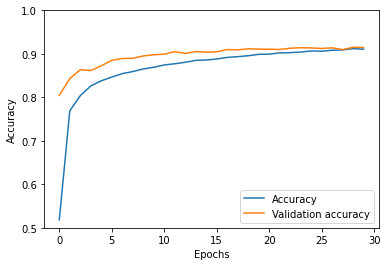

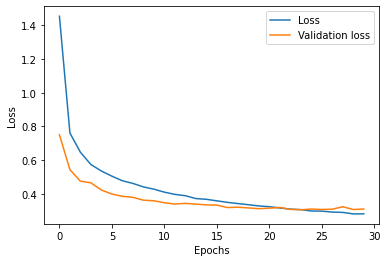

In [ ]:
# Plot dell'accuracy, validation accuracy e loss
plt.figure(0)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.figure(1)
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose = 2) # Valutazione


814/814 [==============================] - 2s 2ms/step


Text(0, 0.5, 'Vere')

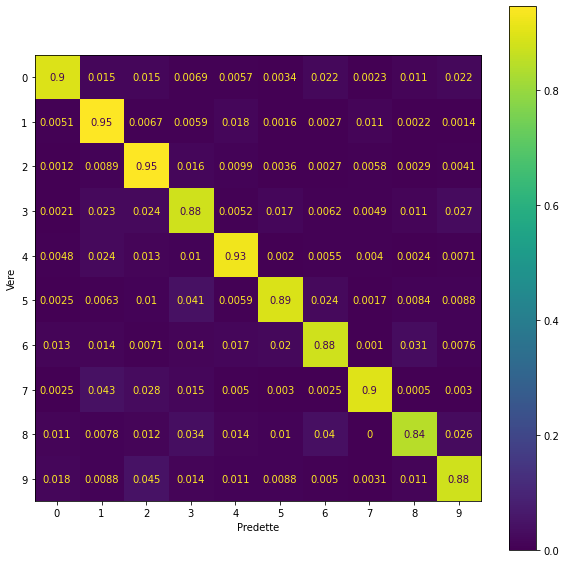

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

# Predizioni su x_test e plot della confusion matrix
y_pred = model.predict(x_test)

y_pred_labels = [np.argmax(i) for i in y_pred]
cm = confusion_matrix(y_test, y_pred_labels, normalize = 'true')
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10, 10))
cmp.plot(ax=ax)
plt.xlabel('Predette')
plt.ylabel('Vere')

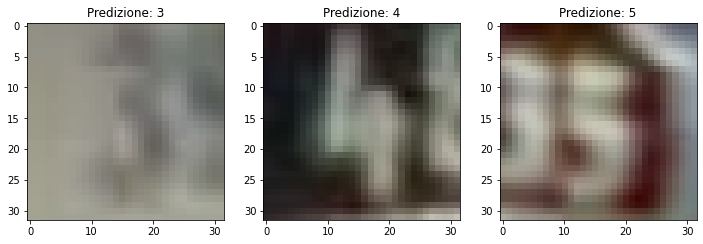

In [ ]:
# Visualizzazione di 3 immagini di test casuali con le relative predizioni
from random import randint
plt.figure(figsize=(12,12))
for i in range(3):
  n = randint(1,26032)
  plt.subplot(1,3,i+1)
  plt.imshow(cv2.cvtColor(x_test[n], cv2.COLOR_BGR2RGB))
  plt.title("Predizione: " + str(y_pred_labels[n]))

### **Porting su STM32F401 NUCLEO-64**

In [ ]:
# Funzione che converte i bytes nei suoi multipli per una facile lettura
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' KB')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' MB')
    else:
        return print('File size: ' + str(size) + ' bytes')


In [ ]:
# Salvataggio modello in formato .h5
import os
!pip install -q pyyaml h5py  # Da installare per il salvataggio

saved_model = "progetto_Rapaccini.h5"
model.save(saved_model)
!ls

# Download del modello (ovviamente verrà scaricato sulla macchina di Colab, occorre quindi farne il download manualmente da li)
try:
  from google.colab import files
  files.download(saved_model)
except ImportError:
  pass

# Stampa dimensione del modello
convert_bytes(os.path.getsize(saved_model), "MB")


drive  progetto_Rapaccini.h5  sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File size: 3.548 MB


In [ ]:
# Conversione ad un modello Tensorflow Lite (non quantizzato) e salvataggio
converter = ts.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

import pathlib
tflite_models_dir = pathlib.Path("./")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/"progetto_Rapaccini_lite.tflite"
tflite_model_file.write_bytes(tflite_model)

print("Dimensioni TF Lite prima della quantizzazione:")
convert_bytes(os.path.getsize(tflite_model_file), "MB")


# Quantizzazione dei parametri per ridurre dimensioni e salvataggio
converter = ts.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [ts.lite.Optimize.DEFAULT]
tflite_model_quantDyn = converter.convert()

import pathlib
tflite_models_dir = pathlib.Path("./")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_quantDyn_file = tflite_models_dir/"progetto_Rapaccini_lite_quant.tflite"
tflite_model_quantDyn_file.write_bytes(tflite_model_quantDyn)
print("Dimensioni TF Lite dopo la quantizzazione: ")
convert_bytes(os.path.getsize(tflite_model_quantDyn_file), "MB")


Dimensioni TF Lite prima della quantizzazione:
File size: 1.171 MB


Dimensioni TF Lite dopo la quantizzazione: 
File size: 0.298 MB


In [ ]:
#@title **Quantizzazione intera per piattaforme integer-only** (da eseguire solo in quel caso)
# Quantizzazione intera per piattaforme integer-only
def representative_data_gen():
  for input_value in ts.data.Dataset.from_tensor_slices(x_train).batch(1).take(100):
    yield [input_value]

# quantization
converter.target_spec.supported_ops = [ts.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = ts.int8
converter.inference_output_type = ts.int8
converter.optimizations = [ts.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
tflite_model_quantInt = converter.convert()

interpreter = ts.lite.Interpreter(model_content=tflite_model_quantInt)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

# Save the quantized int model:
import pathlib
tflite_models_dir = pathlib.Path("./")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_quantInt_file = tflite_models_dir/"progetto_Rapaccini_quantInt.tflite"
tflite_model_quantInt_file.write_bytes(tflite_model_quantInt)

# Estimate size
convert_bytes(os.path.getsize(tflite_model_quantInt_file), "MB")

try:
  from google.colab import files
  files.download(tflite_model_file)
  files.download(tflite_model_quantDyn_file)
  #files.download(tflite_model_quantFloat_file)
  files.download(tflite_model_quantInt_file)
except ImportError:
  pass


In [ ]:
# Codifica di y_test in one-hot per la validazione su board
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

values = array(y_test)

# Codifica intera
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# Codifica binaria
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_test_onehot = onehot_encoder.fit_transform(integer_encoded)
print(y_test_onehot)

#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Download dei dati di test in formato NumPy array per la validazione su board
np.save("x_test.npy", x_test)
np.save("y_test_onehot.npy", y_test_onehot)

try:
  from google.colab import files
  #files.download("x_test.npy")
  files.download("y_test_onehot.npy")
except ImportError:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_test_onehot_reduced = y_test_onehot[0:250]
x_test_reduced = x_test[0:250]
np.save("x_test_reduced.npy", x_test_reduced)
try:
  from google.colab import files
  files.download("x_test_reduced.npy")
except ImportError:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>